# 국민연금 가입자 조회 

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# 한글폰트 설정
from matplotlib import font_manager, rc
import platform
try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
plt.rcParams['axes.unicode_minus'] = False  

In [3]:
base_path = r'D:\NLP2501\dataset'

In [4]:
df = pd.read_csv(os.path.join(base_path, 'national-pension.csv'), encoding='cp949')

df.head(3)

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2025-04,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,4,809160,0,0
1,2025-04,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,322,170213320,1,6
2,2025-04,디에스디엘(주),104811,1,04526,서울특별시 중구 남대문로4가,서울특별시 중구 세종대로,1114011700,1114054000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,16,5291340,1,1




|                          변경 전 | 변경 후                 |
| -------------------------------: | ----------------------- |
|                     자료생성년월 | **삭제**                |
|                         사업장명 | 사업장명                |
|                   사업자등록번호 | 사업자등록번호          |
| 사업장가입상태코드 1 등록 2 탈퇴 | 가입상태                |
|                         우편번호 | **우편번호**            |
|               사업장지번상세주소 | **삭제**                |
|             사업장도로명상세주소 | 주소                    |
|               고객법정동주소코드 | **삭제**                |
|               고객행정동주소코드 | **삭제**                |
|           법정동주소광역시도코드 | 시도코드                |
|       법정동주소광역시시군구코드 | 시군구코드              |
| 법정동주소광역시시군구읍면동코드 | 읍면동코드              |
| 사업장형태구분코드 1 법인 2 개인 | **삭제**                |
|                   사업장업종코드 | 업종코드                |
|                 사업장업종코드명 | 업종코드명              |
|                         적용일자 | **삭제**                |
|                       재등록일자 | **삭제**                |
|                         탈퇴일자 | 탈퇴일자                |
|                         가입자수 | 가입자수                |
|                     당월고지금액 | 금액                    |
|                     신규취득자수 | 신규                    |
|                     상실가입자수 | 상실                    |



In [5]:
# 코드를 입력해 주세요
df.columns = [
    '자료생성년월', '사업장명', '사업자등록번호', '가입상태', '우편번호',
    '사업장지번상세주소', '주소', '고객법정동주소코드', '고객행정동주소코드', 
    '시도코드', '시군구코드', '읍면동코드', 
    '사업장형태구분코드 1 법인 2 개인', '업종코드', '업종코드명', 
    '적용일자', '재등록일자', '탈퇴일자',
    '가입자수', '금액', '신규', '상실'
]
df = df.drop(['자료생성년월', '우편번호', '사업장지번상세주소', '고객법정동주소코드', '고객행정동주소코드', '사업장형태구분코드 1 법인 2 개인', '적용일자', '재등록일자'], axis=1)
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,우성기전(주),126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,809160,0,0
1,희성전자(주),106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,322,170213320,1,6
2,디에스디엘(주),104811,1,서울특별시 중구 세종대로,11,140,117,701201,비주거용 건물 임대업(점포 자기땅),NaN,16,5291340,1,1
3,(주)헤럴드,104810,1,서울특별시 용산구 후암로4길,11,170,101,221200,잡지 및 정기 간행물 발행업,NaN,319,133662320,0,2
4,천일해운(주),105816,1,서울특별시 용산구 대사관로12길,11,170,131,519113,상품 종합 도매업,NaN,9,2664040,2,0


## 사업자명 클린징

- (주) 가 포함된 사업장명

In [7]:
df.loc[df['사업장명'].str.contains('\(주\)')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,우성기전(주),126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,809160,0,0
1,희성전자(주),106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,322,170213320,1,6
2,디에스디엘(주),104811,1,서울특별시 중구 세종대로,11,140,117,701201,비주거용 건물 임대업(점포 자기땅),NaN,16,5291340,1,1
3,(주)헤럴드,104810,1,서울특별시 용산구 후암로4길,11,170,101,221200,잡지 및 정기 간행물 발행업,NaN,319,133662320,0,2
4,천일해운(주),105816,1,서울특별시 용산구 대사관로12길,11,170,131,519113,상품 종합 도매업,NaN,9,2664040,2,0


In [8]:
# Regular Expression(정규화) 모듈 사용
import re

pattern1 = '(\([^)]+\))'
re.sub(pattern1, '', '우성전기(주)')

'우성전기'

- [주] 가 포함된 사업장명

In [9]:
pattern2 = '(\[[^)]+\])'
re.sub(pattern2, '', '에스티테크[주]')

'에스티테크'

- 사업장명에 / 가 포함된 경우 

In [10]:
df.loc[df['사업장명'].str.contains('\/')].head(10)

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
919,(주)동양/건재부문,101853,1,서울특별시 영등포구 국제금융로2길,11,560,110,269401,시멘트 제조업,NaN,295,143202700,1,3
2103,재우교통/주,205812,1,서울특별시 마포구 가양대로,11,440,127,602201,택시 운송업,NaN,3,823400,0,0
4765,(주)한영파트너스FH/월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,983400,0,0
16837,의료법인해정의료재단/더좋은병원,502821,1,대구광역시 수성구 명덕로,27,260,105,851101,요양병원,NaN,205,50726580,11,6
20023,사)강원도지체장애인협회고성군지회/장애인종합상담실/편의,227826,1,강원특별자치도 고성군 간성읍 간성로30번길,51,820,250,999999,BIZ_NO미존재사업장,NaN,3,918520,0,0
20871,안산시청(의료급여사례관리/통합돌봄과),134830,1,경기도 안산시 단원구 화랑로,41,273,101,701201,비주거용 건물 임대업(점포 자기땅),NaN,5,1511800,0,0
21347,(주)영일에이치오엠/이동그린빌명품,506811,1,경상북도 포항시 남구 대이로,47,111,117,749300,건축물 일반 청소업,NaN,3,834280,0,1
23859,전용부품판매/주,204817,1,서울특별시 동대문구 전농로4길,11,230,105,503003,자동차 중고 부품 및 내장품 판매업,NaN,3,983700,0,0
25265,민현건설(주)/본사,507810,1,대전광역시 서구 대덕대로,30,170,113,452102,유리 및 창호 공사업,NaN,3,376360,0,0
25767,중앙산업(자)/생활폐기물 수집운반 대행사업,138810,1,경기도 의왕시 부곡중앙북9길,41,430,103,900100,지정 외 폐기물 수집 운반업,NaN,9,2716900,0,0


- 그 밖의 특수 문자 제거 

In [11]:
pattern3 = '[^A-Za-z0-9가-힣]'
result = re.sub(pattern3, ' ', '*^%$^의료법인%해정^&*****%!@의료재단/더/좋은/병원')
result = re.sub(' +', ' ', result)
result

' 의료법인 해정 의료재단 더 좋은 병원'

In [15]:
# 검증코드 (변경전)
df.loc[[143146, 4765, 24109, 23092, 546000]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
143146,연안알루미늄(주),136812,1,경기도 김포시 대곶면 대곶남로,41,570,340,369301,체조 육상 및 체력 단련용 장비 제조업,NaN,40,13605100,0,3
4765,(주)한영파트너스FH/월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,983400,0,0
24109,상상시티주식회사,303813,1,강원특별자치도 춘천시 춘천로,51,110,112,452102,유리 및 창호 공사업,NaN,5,1462120,0,0
23092,(주)삼성공조설비,504811,1,대구광역시 북구 검단공단로21길,27,230,113,452104,배관 및 냉ㆍ난방 공사업,NaN,7,2437980,0,0
546000,주식회사 한성정공,552860,1,경기도 안산시 단원구 당쟁이로,41,273,103,292903,주형 및 금형 제조업,NaN,4,1228500,4,0


In [16]:
# 코드를 입력해 주세요
def preprocessing(x):
    x = re.sub(pattern1, '', x)
    x = re.sub(pattern2, '', x)
    x = re.sub(pattern3, ' ', x)
    x = re.sub(' +', ' ', x)
    return x

df['사업장명'] = df['사업장명'].apply(preprocessing)

In [17]:
# 검증코드 (변경후)
df.loc[[143146, 4765, 24109, 23092, 546000]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
143146,연안알루미늄,136812,1,경기도 김포시 대곶면 대곶남로,41,570,340,369301,체조 육상 및 체력 단련용 장비 제조업,NaN,40,13605100,0,3
4765,한영파트너스FH 월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,983400,0,0
24109,상상시티주식회사,303813,1,강원특별자치도 춘천시 춘천로,51,110,112,452102,유리 및 창호 공사업,NaN,5,1462120,0,0
23092,삼성공조설비,504811,1,대구광역시 북구 검단공단로21길,27,230,113,452104,배관 및 냉ㆍ난방 공사업,NaN,7,2437980,0,0
546000,주식회사 한성정공,552860,1,경기도 안산시 단원구 당쟁이로,41,273,103,292903,주형 및 금형 제조업,NaN,4,1228500,4,0


# 분석
2025년도에 탈퇴한 기업의 월별 탈퇴수를 bar 그래프로 시각화 

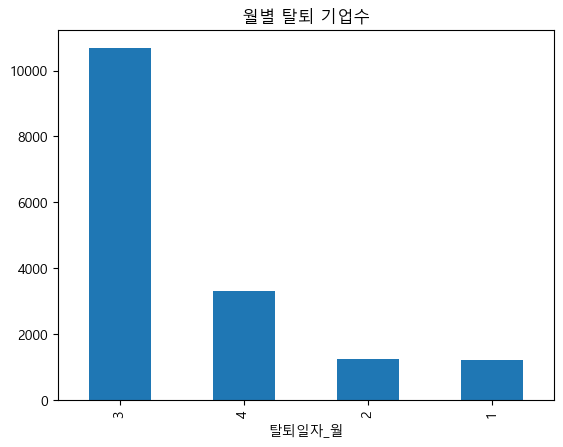

In [18]:
# 코드를 입력해 주세요
df['탈퇴일자_연도'] =  pd.to_datetime(df['탈퇴일자']).dt.year
df['탈퇴일자_월'] =  pd.to_datetime(df['탈퇴일자']).dt.month
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2025), '탈퇴일자_월'].astype('int').value_counts().plot(kind='bar')
plt.title('월별 탈퇴 기업수')
plt.show()
